### Imports

In [1]:
import os
import pickle
import pymysql
import datetime
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
%matplotlib inline

### MySQL Settings

In [2]:
conn = pymysql.connect(host='localhost', port=3306, user='root', password='root', db='homedb')

### Research Questions

1. How much time on average does it take for an SQL tagged question to be answered? DONE <input type='checkbox' checked></input><br>
2. How many of the extracted SQL queries are syntactically (in)valid? DONE <input type='checkbox' checked></input><br>
3. How many of the extracted SQL queries have semantic bugs? DONE <input type='checkbox' checked></input><br>
4. How many semantic bugs do the extracted queries have on average? DONE <input type='checkbox' checked></input><br>
5. What is the distribution of the semantic bugs? DONE <input type='checkbox' checked></input><br>
6. How many of the accepted answers have syntactically (in)valid SQL queries? DONE <input type='checkbox'></input><br>
7. How many of the accepted answers have semantically (in)valid SQL queries? DONE <input type='checkbox'></input><br>
8. How many syntactically (in)valid SQL queries does a question have on average? DONE <input type='checkbox'></input><br>
9. How many semantically (in)valid SQL queries does a question have on average? DONE <input type='checkbox'></input><br>
10. Do users talk about semantic bugs in the posts where these are identified? DONE <input type='checkbox'></input><br>
11. Do users realize that their SQL queries contain semantic bugs? DONE <input type='checkbox'></input><br>

### Code

##### RQ 1: How much time on average does it take for an SQL tagged question to be answered?

In [ ]:
get_questions = 'SELECT * FROM questions ORDER BY score DESC'
get_answer = 'SELECT * FROM answers WHERE answer_id = %(id)s'

df = pd.read_sql(get_questions, conn)

def answer_time(row):
    answer = None
    # get the accepted answer if it exists and compute the time delta
    if row.accepted_answer_id != -1:
        answer = pd.read_sql(get_answer, params={'id': row.accepted_answer_id}, con=conn)
        if len(answer) > 0:
            return answer.iloc[0].creation_date.to_pydatetime() - row.creation_date.to_pydatetime()
    return None

df['answer_time'] = df.apply(answer_time, axis=1)

In [ ]:
df['answer_time'].median()

##### RQ 2: How many of the extracted SQL queries are syntactically valid?

In [3]:
get_valid_queries = 'SELECT * FROM queries WHERE is_valid = 1'
get_invalid_queries = 'SELECT * FROM queries WHERE is_valid = 0'

valid_queries = pd.read_sql(get_valid_queries, conn)
invalid_queries = pd.read_sql(get_invalid_queries, conn)
print(f'valid queries: {len(valid_queries)}')
print(f'invalid queries: {len(invalid_queries)}')

valid queries: 172841
invalid queries: 222789


##### RQ 3: How many of the extracted SQL queries have semantic bugs?

In [4]:
get_bugs = 'SELECT * FROM bugs'

bugs = pd.read_sql(get_bugs, conn)
print(f'queries with semantic bugs: {len(bugs)}')

queries with semantic bugs: 28377


##### RQ 4: How many semantic bugs do the extracted queries have on average?

In [5]:
get_bugs = 'SELECT * FROM bugs'

bugs_dict = dict()
bugs = pd.read_sql(get_bugs, conn)

def count_bugs(row):
    errors = row.errors.split(',')
    num = len(errors)
    bugs_dict[num] = bugs_dict.get(num, 0) + 1
    return num

bugs['errors'] = bugs.apply(count_bugs, axis=1)
tmp = bugs['errors'].count() / len(valid_queries)
print(f'semantic bugs on average: {tmp}')

semantic bugs on average: 0.16417979530319773


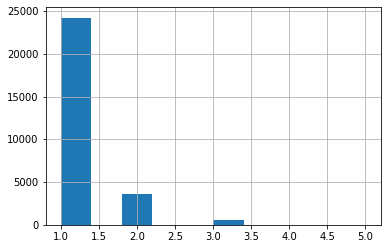

In [6]:
bugs['errors'].hist(bins=10)

In [7]:
print(bugs_dict)

{1: 24227, 2: 3565, 3: 549, 4: 34, 5: 2}


##### RQ 5: What is the distribution of the semantic bugs?

In [10]:
get_bugs = 'SELECT * FROM bugs'
error_codes = dict()

bugs = pd.read_sql(get_bugs, conn)

def count_error_codes(row):
    errors = row.errors.replace('[', '').replace(']', '')
    errors = errors.split(',')
    for error in errors:
        error = error.replace(',', '').strip()
        if error_codes.get(error) is not None:
            error_codes[error] += 1
        else:
            error_codes[error] = 1

bugs['errors'] = bugs.apply(count_error_codes, axis=1)


get_bugs = 'SELECT * FROM evo_sql_bugs'
bugs = pd.read_sql(get_bugs, conn)
bugs['errors'] = bugs.apply(count_error_codes, axis=1)

error_codes_sorted = dict()
for key in sorted(error_codes):
    error_codes_sorted[key] = error_codes[key]
error_codes = error_codes_sorted

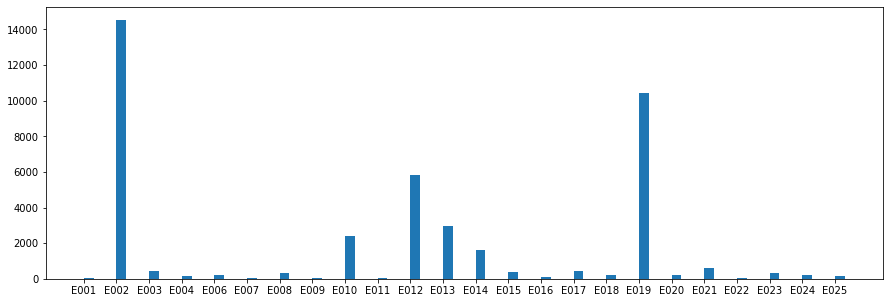

In [11]:
plt.figure(figsize=(15, 5))
plt.bar(range(len(error_codes)), list(error_codes.values()), align='edge', width=0.3)
plt.xticks(range(len(error_codes)), list(error_codes.keys()))
# plt.savefig('prevalence.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
x = list()
y = list()
for key, value in error_codes.items():
    x.append(key)
    y.append(value)

plt.figure(figsize=(15, 5))
sns.barplot(x, y, palette='Blues')
plt.show()

In [ ]:
E = len(pd.read_sql('SELECT * FROM queries WHERE is_valid = 1', conn))
E001 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E001%"', conn))
E002 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E002%"', conn))
E003 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E003%"', conn))
E004 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E004%"', conn))
E005 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E005%"', conn))
E006 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E006%"', conn))
E007 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E007%"', conn))
E008 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E008%"', conn))
E009 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E009%"', conn))
E010 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E010%"', conn))
E011 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E011%"', conn))
E012 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E012%"', conn))
E013 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E013%"', conn))
E014 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E014%"', conn))
E015 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E015%"', conn))
E016 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E016%"', conn))
E017 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E017%"', conn))
E018 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E018%"', conn))
E019 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E019%"', conn))
E020 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E020%"', conn))
E021 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E021%"', conn))
E022 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E022%"', conn))
E023 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E023%"', conn))
E024 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E024%"', conn))
E025 = len(pd.read_sql('SELECT * FROM bugs WHERE errors LIKE "%E025%"', conn))

In [ ]:
bugs = dict()
bugs['E001'] = E001 / E * 100
bugs['E002'] = E002 / E * 100
bugs['E003'] = E003 / E * 100
bugs['E004'] = E004 / E * 100
bugs['E005'] = E005 / E * 100
bugs['E006'] = E006 / E * 100
bugs['E007'] = E007 / E * 100
bugs['E008'] = E008 / E * 100
bugs['E009'] = E009 / E * 100
bugs['E010'] = E010 / E * 100
bugs['E011'] = E011 / E * 100
bugs['E012'] = E012 / E * 100
bugs['E013'] = E013 / E * 100
bugs['E014'] = E014 / E * 100
bugs['E015'] = E015 / E * 100
bugs['E016'] = E016 / E * 100
bugs['E017'] = E017 / E * 100
bugs['E018'] = E018 / E * 100
bugs['E019'] = E019 / E * 100
bugs['E020'] = E020 / E * 100
bugs['E021'] = E021 / E * 100
bugs['E022'] = E022 / E * 100
bugs['E023'] = E023 / E * 100
bugs['E024'] = E024 / E * 100
bugs['E025'] = E025 / E * 100
bugs = dict(sorted(bugs.items(), key=lambda item: item[1]))
bugs

In [ ]:
get_bugs = 'SELECT * FROM bugs'
get_query = 'SELECT * FROM queries WHERE query_id = %(id)s'
bugs = pd.read_sql(get_bugs, conn)

query_bugs = list()
query_complexities = list()

def compute_query_complexity(row):
    errors = row.errors.replace('[', '').replace(']', '').split(',')
    query = pd.read_sql(get_query, params={'id': row.query_id}, con=conn)
    predicates = int(query.iloc[0][5])
    joins      = int(query.iloc[0][6])
    subqueries = int(query.iloc[0][7])
    functions  = int(query.iloc[0][8])
    columns    = int(query.iloc[0][9])
    complexity = predicates + joins + subqueries + functions + columns
    query_bugs.append(len(errors))
    query_complexities.append(complexity)

bugs['errors'] = bugs.apply(compute_query_complexity, axis=1)

In [ ]:
get_bugs = 'SELECT * FROM evo_sql_bugs'
get_query = 'SELECT * FROM evo_sql_queries WHERE query_id = %(id)s'
bugs = pd.read_sql(get_bugs, conn)

def compute_query_complexity(row):
    errors = row.errors.replace('[', '').replace(']', '').split(',')
    query = pd.read_sql(get_query, params={'id': row.query_id}, con=conn)
    predicates = int(query.iloc[0][5])
    joins      = int(query.iloc[0][6])
    subqueries = int(query.iloc[0][7])
    functions  = int(query.iloc[0][8])
    columns    = int(query.iloc[0][9])
    complexity = predicates + joins + subqueries + functions + columns
    query_bugs.append(len(errors))
    query_complexities.append(complexity)

bugs['errors'] = bugs.apply(compute_query_complexity, axis=1)

In [ ]:
print(f'bugs: {len(query_bugs)}')
print(f'complexities: {len(query_complexities)}')

In [ ]:
with open('pickles/query_bugs.pkl', 'wb') as f:
    pickle.dump(query_bugs, f)

In [ ]:
with open('pickles/query_bugs.pkl', 'rb') as f:
    query_bugs = pickle.load(f)
len(query_bugs)

In [ ]:
with open('pickles/query_complexities.pkl', 'wb') as f:
    pickle.dump(query_complexities, f)

In [ ]:
with open('pickles/query_complexities.pkl', 'rb') as f:
    query_complexities = pickle.load(f)
len(query_complexities)

In [ ]:
_data = {'bugs': query_bugs, 'complexity': query_complexities}
df = pd.DataFrame(_data)
df.head(20)

In [ ]:
sns.scatterplot(data = df, x = 'bugs', y = 'complexity', rasterized=True)
# plt.savefig('complexity.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
sns.boxplot(x = 'bugs', y = 'complexity', data=df, flierprops = dict(markerfacecolor = '0.50', markersize = 2), palette='Blues')
plt.savefig('complexity_box.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
sns.displot(data = df, x = 'complexity', bins=250)
# plt.savefig('complexity_distribution.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
# Pearson's r
scipy.stats.pearsonr(query_bugs, query_complexities)

In [ ]:
# Spearman's rho
scipy.stats.spearmanr(query_bugs, query_complexities)

In [ ]:
# Kendall's tau
scipy.stats.kendalltau(query_bugs, query_complexities)

In [ ]:
b1 = df.loc[df['bugs'] == 1]['complexity']
b2 = df.loc[df['bugs'] == 2]['complexity']
b3 = df.loc[df['bugs'] == 3]['complexity']
b4 = df.loc[df['bugs'] == 4]['complexity']
b5 = df.loc[df['bugs'] == 5]['complexity']

In [ ]:
f_oneway(b1, b2, b3, b4, b5)